<a href="https://colab.research.google.com/github/G-Navyasree/loanstatus_and_salesforecasting/blob/development%2Fsales_forecasting/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the Python Essential Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sklearn as sk

In [ ]:
feature_dataset=pd.read_csv('features.csv')
stores_dataset=pd.read_csv('stores.csv')
#train_dataset=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')

In [ ]:
feature_dataset.shape


(8190, 12)

In [ ]:
#This gives additional information realted to store,department,and regional activity for the given dates
feature_dataset.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores_dataset.shape


(45, 3)

In [ ]:
stores_dataset.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
train_dataset=pd.read_csv('train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
train_dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train_dataset.shape

(241338, 5)

**Exploratory Data Analysis**

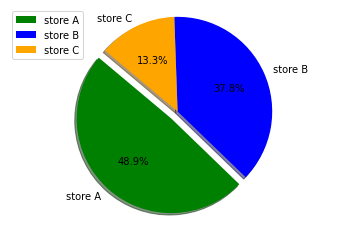

In [ ]:
#pie-chart for the visual representation of store types
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['green', 'blue', 'orange']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

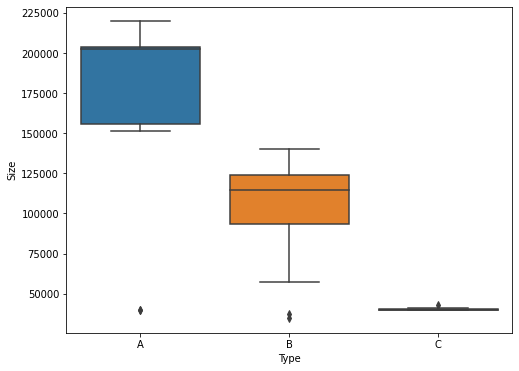

In [ ]:
# boxplot for sizes of types of stores
store_type = pd.concat([stores_dataset['Type'], stores_dataset['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

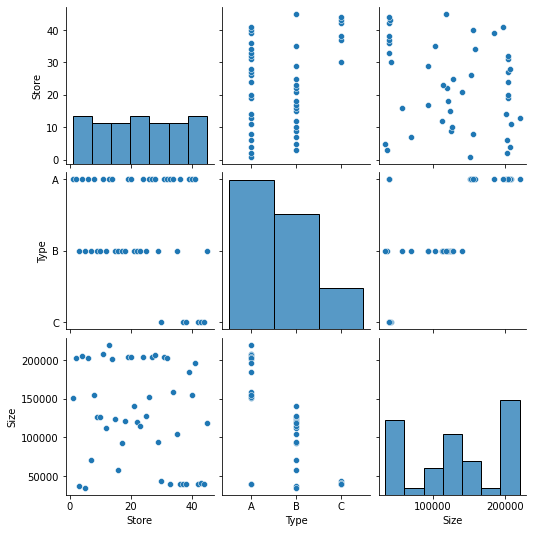

In [ ]:
#pair plot
sns.pairplot(stores_dataset,vars=['Store','Type','Size'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


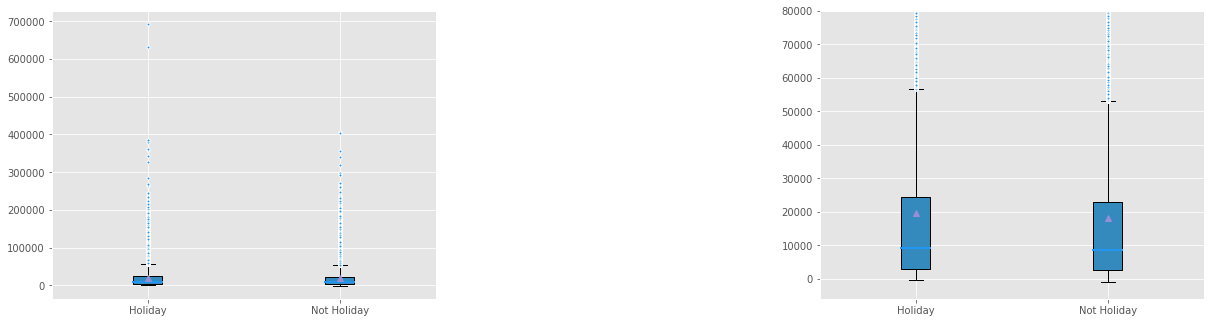

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

sales_holiday=train_dataset[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']

#median
medianprop={'color':'#2196F3',
            'linewidth': 2,
            'linestyle':'-'}
# outliers

flierprop={'color' : '#EC407A',
          'marker' : 'o',
          'markerfacecolor': '#2196F3',
          'markeredgecolor':'white',
          'markersize' : 3,
          'linestyle' : 'None',
          'linewidth' : 0.1}



axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)


axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)

axes[1].set_ylim(-6000,80000)

plt.show()

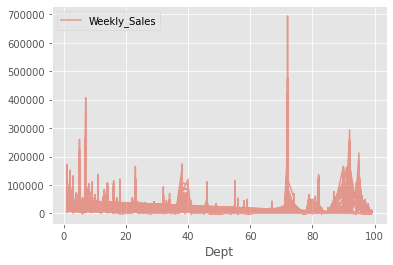

In [ ]:
train_dataset.plot(kind='line',x='Dept',y='Weekly_Sales',alpha=1.5,fig=(4,5))

**Feature Engineering**

In [ ]:
train_dataset['Date'] = pd.to_datetime(train_dataset['Date'])
test_dataset['Date'] = pd.to_datetime(test_dataset['Date'])

#The week ordinal of the year.
train_dataset['Week'] = train_dataset['Date'].dt.week
test_dataset['Week'] = test_dataset['Date'].dt.week

#The day of the week with Monday=0, Sunday=6.
train_dataset['Day_of_week'] =train_dataset['Date'].dt.dayofweek
test_dataset['Day_of_week'] =test_dataset['Date'].dt.dayofweek

#The month as January=1, December=12.
train_dataset['Month'] =train_dataset['Date'].dt.month 
test_dataset['Month'] =test_dataset['Date'].dt.month 

#The year of the datetime.
train_dataset['Year'] =train_dataset['Date'].dt.year
test_dataset['Year'] =test_dataset['Date'].dt.year

#The days of the datetime.
train_dataset['Day'] =train_dataset['Date'].dt.day 
test_dataset['Day'] =test_dataset['Date'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


**Merge train,test and the features dataset**

In [ ]:
feature_dataset['Date'] = pd.to_datetime(feature_dataset['Date'])

#merge the features
train_with_feature = pd.merge_asof(train_dataset, feature_dataset, on='Store',by='Date')
test_with_feature = pd.merge_asof(test_dataset, feature_dataset, on='Store',by='Date')

In [ ]:
#let's take mean of Temp and Unemployment
train_with_feature['Temp_mean'] = train_with_feature['Temperature'].mean()
train_with_feature['Unemployment_mean'] = train_with_feature['Unemployment'].mean()
#test data
test_with_feature['Temp_mean'] = test_with_feature['Temperature'].mean()
test_with_feature['Unemployment_mean'] = test_with_feature['Unemployment'].mean()

In [ ]:
train_with_feature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Week,Day_of_week,Month,Year,Day,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Temp_mean,Unemployment_mean
0,1,1,2010-02-05,24924.50,False,5,4,2,2010,5,...,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,59.59044,7.523872
1,1,1,2010-02-12,46039.49,True,6,4,2,2010,12,...,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,59.59044,7.523872
2,1,1,2010-02-19,41595.55,False,7,4,2,2010,19,...,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,59.59044,7.523872
3,1,1,2010-02-26,19403.54,False,8,4,2,2010,26,...,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,59.59044,7.523872
4,1,1,2010-03-05,21827.90,False,9,4,3,2010,5,...,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,59.59044,7.523872


In [ ]:
train_with_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241338 entries, 0 to 241337
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Store              241338 non-null  int64         
 1   Dept               241338 non-null  int64         
 2   Date               241338 non-null  datetime64[ns]
 3   Weekly_Sales       241338 non-null  float64       
 4   IsHoliday_x        241338 non-null  object        
 5   Week               241338 non-null  int64         
 6   Day_of_week        241338 non-null  int64         
 7   Month              241338 non-null  int64         
 8   Year               241338 non-null  int64         
 9   Day                241338 non-null  int64         
 10  Temperature        241338 non-null  float64       
 11  Fuel_Price         241338 non-null  float64       
 12  MarkDown1          86518 non-null   float64       
 13  MarkDown2          68905 non-null   float64 

**Merge all features in a single dataframe**

In [ ]:
train_with_feature_new = pd.merge(train_with_feature,stores_dataset)
test_with_feature_new = pd.merge(test_with_feature,stores_dataset)

In [ ]:
train_with_feature_new.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Week,Day_of_week,Month,Year,Day,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Temp_mean,Unemployment_mean,Type,Size
0,1,1,2010-02-05,24924.50,False,5,4,2,2010,5,...,NaN,NaN,NaN,211.096358,8.106,False,59.59044,7.523872,A,151315
1,1,1,2010-02-12,46039.49,True,6,4,2,2010,12,...,NaN,NaN,NaN,211.242170,8.106,True,59.59044,7.523872,A,151315
2,1,1,2010-02-19,41595.55,False,7,4,2,2010,19,...,NaN,NaN,NaN,211.289143,8.106,False,59.59044,7.523872,A,151315
3,1,1,2010-02-26,19403.54,False,8,4,2,2010,26,...,NaN,NaN,NaN,211.319643,8.106,False,59.59044,7.523872,A,151315
4,1,1,2010-03-05,21827.90,False,9,4,3,2010,5,...,NaN,NaN,NaN,211.350143,8.106,False,59.59044,7.523872,A,151315


As we have “IsHoliday ”feature in each of the datasets, it has been duplicated. So let's make it correct by removing one of them and rename it to the original “IsHoliday” column name.

In [ ]:
#drop the dublicate of IsHoliday column
train_with_feature = train_with_feature_new.drop(columns=['IsHoliday_x','Date'])
test_with_feature = test_with_feature_new.drop(columns=['IsHoliday_x'])

#let's rename the IsHoliday_y column to IsHoliday
train_with_feature = train_with_feature.rename(columns={"IsHoliday_y": "IsHoliday"})
test_with_feature = test_with_feature.rename(columns={"IsHoliday_y": "IsHoliday"})

In [ ]:
train_with_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241338 entries, 0 to 241337
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Store              241338 non-null  int64  
 1   Dept               241338 non-null  int64  
 2   Weekly_Sales       241338 non-null  float64
 3   Week               241338 non-null  int64  
 4   Day_of_week        241338 non-null  int64  
 5   Month              241338 non-null  int64  
 6   Year               241338 non-null  int64  
 7   Day                241338 non-null  int64  
 8   Temperature        241338 non-null  float64
 9   Fuel_Price         241338 non-null  float64
 10  MarkDown1          86518 non-null   float64
 11  MarkDown2          68905 non-null   float64
 12  MarkDown3          80452 non-null   float64
 13  MarkDown4          85848 non-null   float64
 14  MarkDown5          86518 non-null   float64
 15  CPI                241338 non-null  float64
 16  Un

Mapping True in IsHoliday column to 1 and the False to 0

In [ ]:
def paron(x):
    if x == False:
        return 0
    return 1
#Train.csv
actualScore = train_with_feature['IsHoliday']
posiveNegave = actualScore.map(paron)
train_with_feature['IsHoliday'] = posiveNegave
print("Shape of train_with_feature: ", train_with_feature.shape)

#Test.csv
actualScore_test = test_with_feature['IsHoliday']
posiveNegave = actualScore.map(paron)
test_with_feature['IsHoliday'] = posiveNegave
print("Shape of test_with_feature: ", test_with_feature.shape)

Shape of train_with_feature:  (241338, 22)
Shape of test_with_feature:  (115064, 22)


Converting types of stores to numeric values

In [ ]:
def type_count(x):    
    if x == 'A':
        return 1
    elif x == 'B':
        return 2
    return 3

#Train.csv
actualScore = train_with_feature['Type']
type_coun = actualScore.map(type_count)
train_with_feature['Type'] = type_coun


#Test.csv
actualScore = test_with_feature['Type']
type_coun = actualScore.map(type_count)
test_with_feature['Type'] = type_coun

In [ ]:

train_with_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241338 entries, 0 to 241337
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Store              241338 non-null  int64  
 1   Dept               241338 non-null  int64  
 2   Weekly_Sales       241338 non-null  float64
 3   Week               241338 non-null  int64  
 4   Day_of_week        241338 non-null  int64  
 5   Month              241338 non-null  int64  
 6   Year               241338 non-null  int64  
 7   Day                241338 non-null  int64  
 8   Temperature        241338 non-null  float64
 9   Fuel_Price         241338 non-null  float64
 10  MarkDown1          86518 non-null   float64
 11  MarkDown2          68905 non-null   float64
 12  MarkDown3          80452 non-null   float64
 13  MarkDown4          85848 non-null   float64
 14  MarkDown5          86518 non-null   float64
 15  CPI                241338 non-null  float64
 16  Un

<function matplotlib.pyplot.show>

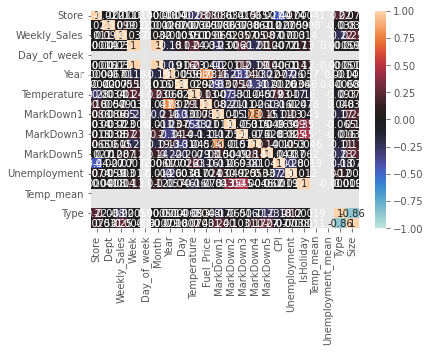

In [ ]:
corr_matrix=train_with_feature.corr()
sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=0,annot=True)
plt.show

**Fixing missing values**

In [ ]:
train_with_feature=train_with_feature.fillna(0)
test_with_feature=test_with_feature.fillna(0)

In [ ]:
# After some trails we got to know the mean of feature is improving our score.So, let's add mean of Fuel and mean of CPI feature
#train data
train_with_feature['Fuel_Price_mean'] = train_with_feature['Fuel_Price'].mean()
train_with_feature['CPI_mean'] = train_with_feature['CPI'].mean()
#test data
test_with_feature['Fuel_Price_mean'] = test_with_feature['Fuel_Price'].mean()
test_with_feature['CPI_mean'] = test_with_feature['CPI'].mean()

**Feature Selection**

After a few submissions, I got to know that Markdown features are not helping much to improve the score. So, I had to dope them out.

And as we have already taken the mean of CPI, Unemployment, Fuel_Price we can drop them aswell. As we saw in the Correlation graph, Day_of_week is not stable, so we also need to drop this feature

In [ ]:
features_drop=['CPI','Unemployment','Fuel_Price','Day_of_week','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
train_final=train_with_feature.drop(features_drop, axis=1)


In [ ]:
test_final=test_with_feature.drop(features_drop, axis=1)

In [ ]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Store              115064 non-null  int64         
 1   Dept               115064 non-null  int64         
 2   Date               115064 non-null  datetime64[ns]
 3   Week               115064 non-null  int64         
 4   Month              115064 non-null  int64         
 5   Year               115064 non-null  int64         
 6   Day                115064 non-null  int64         
 7   Temperature        115064 non-null  float64       
 8   IsHoliday          115064 non-null  int64         
 9   Temp_mean          115064 non-null  float64       
 10  Unemployment_mean  115064 non-null  float64       
 11  Type               115064 non-null  int64         
 12  Size               115064 non-null  int64         
 13  Fuel_Price_mean    115064 non-null  float64 

**Split the data into train and test**

In [ ]:
#train
train_X=train_final.drop(['Weekly_Sales'], axis=1)
train_y=train_final['Weekly_Sales'] 

#test
test_X=test_final.drop('Date',axis=1).copy()
train_X.shape, train_y.shape, test_X.shape

((241338, 14), (241338,), (115064, 14))

In [ ]:
train_X.head()

,Store,Dept,Week,Month,Year,Day,Temperature,IsHoliday,Temp_mean,Unemployment_mean,Type,Size,Fuel_Price_mean,CPI_mean
0,1,1,5,2,2010,5,42.31,0,59.59044,7.523872,1,151315,3.35055,174.945534
1,1,1,6,2,2010,12,38.51,1,59.59044,7.523872,1,151315,3.35055,174.945534
2,1,1,7,2,2010,19,39.93,0,59.59044,7.523872,1,151315,3.35055,174.945534
3,1,1,8,2,2010,26,46.63,0,59.59044,7.523872,1,151315,3.35055,174.945534
4,1,1,9,3,2010,5,46.50,0,59.59044,7.523872,1,151315,3.35055,174.945534


In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Create a regressor object clf
clf = RandomForestRegressor(n_estimators=100,random_state=0)
clf.fit(train_X, train_y)
y_pred_rf=clf.predict(test_X)
acc_rf= round(clf.score(train_X, train_y) * 100,3)
print(acc_rf)


99.698


In [ ]:
test_dataset=pd.read_csv('test.csv')
test_dataset.shape

(115064, 4)

In [ ]:
predicted = pd.DataFrame({
        "Id": test_dataset.Store.astype(str)+'_'+test_dataset.Dept.astype(str)+'_'+test_dataset.Date.astype(str),
        "Weekly_Sales": y_pred_rf
    })


In [ ]:
predicted

,Id,Weekly_Sales
0,1_1_2012-11-02,36149.9078
1,1_1_2012-11-09,23215.4010
2,1_1_2012-11-16,20736.6065
3,1_1_2012-11-23,21237.3937
4,1_1_2012-11-30,32236.1432
...,...,...
115059,45_98_2013-06-28,118.6795
115060,45_98_2013-07-05,176.8430
115061,45_98_2013-07-12,135.5789
115062,45_98_2013-07-19,94.9990


**The accuracy score for the sales prediction random forest model is 99.6%**